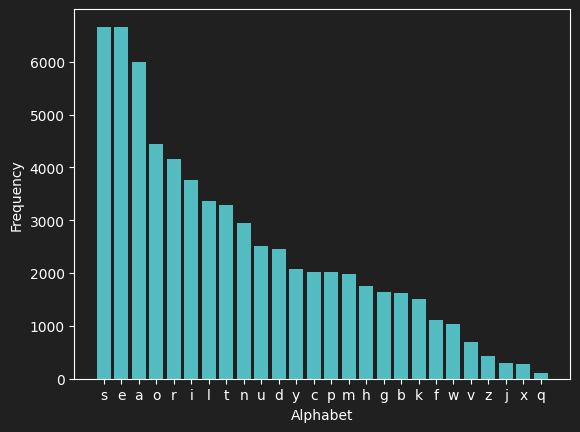

In [13]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Set the background color to black and the text color to white
plt.rcParams['figure.facecolor'] = '202020'
plt.rcParams['axes.facecolor'] = '202020'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

answers_arr = []
with open('/Users/manitk/Documents/GitHub/create-explore/csv/valid_guesses.csv', mode='r') as answers_list:
    answers_list = csv.reader(answers_list)
    for i in answers_list:
        answers_arr.append(i[0])

combined_data = ''.join(answers_arr)
letters_list_x = []
letters_list_y = []
letters_dict = {}
letter_counts = Counter(combined_data)

letters_list_x, letters_list_y = zip(*letter_counts.items())

for i in range(len(letters_list_x)):
    letters_dict[letters_list_x[i]] = letters_list_y[i]

sorted_data = sorted(zip(letters_list_x, letters_list_y), key=lambda x: x[1], reverse=True)
sorted_letters_list_x, sorted_letters_list_y = zip(*sorted_data)

numpy_letter_x = np.array(sorted_letters_list_x)
numpy_letter_y = np.array(sorted_letters_list_y)
bar_color = '#53BCC1'
plt.bar(numpy_letter_x, numpy_letter_y, color=bar_color)
plt.xlabel('Alphabet', color='white')
plt.ylabel('Frequency', color='white')
plt.show()


a - [0.12, 0.38, 0.21, 0.18, 0.11]
b - [0.56, 0.05, 0.21, 0.15, 0.04]
c - [0.45, 0.09, 0.19, 0.2, 0.06]
d - [0.28, 0.03, 0.16, 0.19, 0.34]
e - [0.05, 0.24, 0.13, 0.35, 0.23]
f - [0.54, 0.02, 0.16, 0.21, 0.07]
g - [0.39, 0.05, 0.22, 0.26, 0.09]
h - [0.28, 0.31, 0.07, 0.13, 0.21]
i - [0.04, 0.37, 0.28, 0.23, 0.07]
j - [0.69, 0.04, 0.16, 0.1, 0.01]
k - [0.25, 0.06, 0.18, 0.33, 0.17]
l - [0.17, 0.21, 0.25, 0.23, 0.14]
m - [0.35, 0.1, 0.26, 0.2, 0.09]
n - [0.11, 0.12, 0.33, 0.27, 0.18]
o - [0.06, 0.47, 0.22, 0.16, 0.09]
p - [0.43, 0.11, 0.18, 0.21, 0.07]
q - [0.7, 0.13, 0.12, 0.02, 0.04]
r - [0.15, 0.23, 0.29, 0.17, 0.16]
s - [0.23, 0.01, 0.08, 0.08, 0.59]
t - [0.25, 0.07, 0.19, 0.27, 0.22]
u - [0.08, 0.47, 0.27, 0.16, 0.03]
v - [0.35, 0.07, 0.35, 0.22, 0.01]
w - [0.4, 0.16, 0.26, 0.12, 0.06]
x - [0.06, 0.2, 0.46, 0.04, 0.24]
y - [0.09, 0.13, 0.1, 0.05, 0.63]
z - [0.24, 0.07, 0.33, 0.29, 0.07]


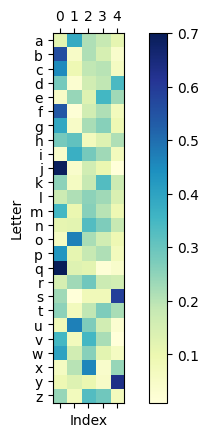

In [2]:
import numpy as np
import matplotlib.pyplot as plt

alphabet = 'abcdefghijklmnopqrstuvwxyz'

letter_counts = {letter: [0, 0, 0, 0, 0] for letter in alphabet}

for word in answers_arr:
    for i in range(len(word)):
        letter = word[i]
        if letter in alphabet:
            letter_counts[letter][i] += 1

for letter, counts in letter_counts.items():
    temp_prob = []
    for i in counts:
        temp_prob.append(round(i/sum(counts),2))
    letter_counts[letter] = temp_prob
    counts = temp_prob
    print(f'{letter} - {counts}')

data = np.array(list(letter_counts.values()))
fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='YlGnBu')

cbar = fig.colorbar(cax)  # Colorbar

ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(len(alphabet)))
ax.set_xticklabels(['0', '1', '2', '3', '4'])
ax.set_yticklabels(list(alphabet))

plt.xlabel("Index")
plt.ylabel("Letter")
plt.show()


In [19]:
score_dict = {}
score = 0

solns_arr = []
with open('/Users/manitk/Desktop/Wordle/csv/valid_solutions.csv', mode='r') as soln_list:
    soln_list = csv.reader(soln_list)
    for i in soln_list:
        solns_arr.append(i[0])

for word in solns_arr:
    score = 0
    for idx, letter in enumerate(word):
        if letter in alphabet:
            score += letters_dict[letter] * data[alphabet.index(letter)][idx]
    score_dict[word] = round(score, 2)

sorted_dict_descending = dict(sorted(score_dict.items(), key=lambda item: item[1], reverse=True))
top_scores = list(sorted_dict_descending.items())

with open("/Users/manitk/Desktop/Wordle/csv/all_solns_scores.csv", mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["Word", "Score"])
        for word, score in top_scores:
            print(f'{word}: {score}')
            csv_writer.writerow([word, score])

basis: 8517.44
torus: 8450.3
bonus: 8305.72
saner: 7780.45
boney: 7609.93
crass: 7592.62
brass: 7591.14
focus: 7407.86
minus: 7390.7
money: 7390.41
locus: 7378.83
chaos: 7358.69
parer: 7347.62
class: 7343.96
gooey: 7342.39
grass: 7321.18
cross: 7311.3
matey: 7232.17
payee: 7215.73
corer: 7202.18
cress: 7200.78
honey: 7191.61
cagey: 7188.8
virus: 7173.95
fetus: 7161.14
press: 7156.35
guess: 7152.94
bliss: 7137.1
puree: 7118.41
rarer: 7103.3
dross: 7085.82
glass: 7072.52
gross: 7039.86
baler: 7027.21
melee: 6997.19
siren: 6992.95
safer: 6984.69
paler: 6984.26
dress: 6975.3
sober: 6958.09
bless: 6950.64
truss: 6923.84
panel: 6922.17
surer: 6916.37
saute: 6909.03
rebus: 6898.51
sower: 6886.82
covey: 6880.15
piney: 6871.48
salty: 6848.17
sorry: 6839.04
spree: 6825.11
cater: 6811.99
sooty: 6792.13
gloss: 6791.2
chess: 6789.81
scree: 6785.54
dopey: 6775.19
beret: 6772.71
floss: 6752.14
sally: 6733.85
ficus: 6712.36
goner: 6698.79
tepee: 6650.01
amass: 6639.85
cadet: 6638.04
tamer: 6610.85
soa

In [18]:
updated_top_scores = {}

def find_top_unique_words(top_scores, csv_filename):
    unique_word = []
    unique_word_count = 0
    
    for word, score in top_scores:
            unique_word.append((word, score))
            unique_word_count += 1

    # This writes the scores of all unique worded solns in the csv file
    with open(csv_filename, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["Word", "Score"])
        for word, score in unique_word:
            if len(set(word)) == len(word):
                print(f'{word}: {score}')
                csv_writer.writerow([word, score])
                updated_top_scores[word] = score

top_scores = list(sorted_dict_descending.items())[:]
find_top_unique_words(top_scores,"/Users/manitk/Desktop/Wordle/csv/all_unique_solns_scores.csv")

torus: 8450.3
bonus: 8305.72
saner: 7780.45
boney: 7609.93
focus: 7407.86
minus: 7390.7
money: 7390.41
locus: 7378.83
chaos: 7358.69
matey: 7232.17
honey: 7191.61
cagey: 7188.8
virus: 7173.95
fetus: 7161.14
baler: 7027.21
siren: 6992.95
safer: 6984.69
paler: 6984.26
sober: 6958.09
panel: 6922.17
saute: 6909.03
rebus: 6898.51
sower: 6886.82
covey: 6880.15
piney: 6871.48
salty: 6848.17
cater: 6811.99
dopey: 6775.19
ficus: 6712.36
goner: 6698.79
cadet: 6638.04
tamer: 6610.85
soapy: 6607.79
nosey: 6582.57
comet: 6569.29
sandy: 6556.19
caper: 6549.36
party: 6546.75
borne: 6532.86
camel: 6506.2
poser: 6484.84
harem: 6484.65
later: 6472.46
taper: 6460.51
baker: 6455.36
cameo: 6433.77
gamer: 6428.26
sauce: 6424.98
valet: 6418.45
parse: 6415.94
canoe: 6405.46
hater: 6392.19
saint: 6383.61
taker: 6367.99
barge: 6353.13
bagel: 6352.64
payer: 6348.91
sonar: 6337.08
salve: 6336.84
facet: 6320.22
forte: 6316.45
water: 6315.39
corny: 6308.7
covet: 6298.43
shied: 6297.13
sinew: 6292.04
sadly: 6283.74


In [17]:
updated_top_scores_list = list(updated_top_scores.items())
from itertools import combinations

words = [t[0] for t in updated_top_scores_list[:500]]
combinations_of_3 = combinations(words, 3)

def has_unique_letters(words):
    all_letters = ''.join(words)
    return len(all_letters) == len(set(all_letters))

unique_letter_combinations = [combo for combo in combinations_of_3 if has_unique_letters(''.join(combo))]
total_scores = [sum(word[1] for word in updated_top_scores_list if word[0] in combo) for combo in unique_letter_combinations]

prob_list = list(zip(unique_letter_combinations, total_scores))
prob_list_sorted = sorted(prob_list, key=lambda x: x[1], reverse=True)

for item in prob_list_sorted:
    print(item)
#(('bonus', 'camel', 'dirty'), 20292.25) for top 200,300,400 words

(('bonus', 'camel', 'dirty'), 20292.25)
(('bonus', 'cadet', 'girly'), 20263.809999999998)
(('bonus', 'warty', 'plied'), 20194.96)
(('minus', 'party', 'bowel'), 20008.940000000002)
(('torus', 'camel', 'pinky'), 19992.93)
(('bonus', 'facet', 'girly'), 19945.989999999998)
(('bonus', 'filet', 'hardy'), 19945.989999999998)
(('torus', 'plied', 'mangy'), 19920.98)
(('bonus', 'filet', 'harpy'), 19903.72)
(('minus', 'cagey', 'world'), 19897.63)
(('torus', 'bagel', 'pinky'), 19839.37)
(('minus', 'bagel', 'forty'), 19834.15)
(('focus', 'panel', 'dirty'), 19810.36)
(('torus', 'plied', 'fancy'), 19809.64)
(('minus', 'party', 'dowel'), 19784.940000000002)
(('bonus', 'party', 'chief'), 19772.94)
(('bonus', 'gavel', 'dirty'), 19749.949999999997)
(('minus', 'cagey', 'forth'), 19733.29)
(('focus', 'baler', 'minty'), 19687.93)
(('focus', 'paler', 'minty'), 19644.98)
(('bonus', 'pried', 'tacky'), 19637.579999999998)
(('torus', 'manly', 'bicep'), 19634.51)
(('bonus', 'warty', 'pixel'), 19595.42)
(('torus',